# Linear/Polynomial Regression.



## Linear Regression


##### Step 1. Reading & Preparing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('student_scores.csv')
dataset.shape

(25, 2)

In [ ]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Plotting:

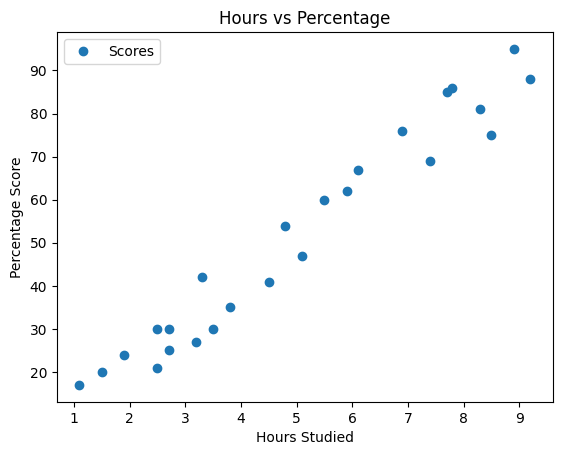

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Train/Test splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Scores', axis=1)
y = dataset['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434669
[9.91065648]


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
from sklearn import metrics

def print_metrics(y_actual, y_pred):
       print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
       print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_pred))
       print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
       print('Coefficient of determination:', metrics.r2_score(y_actual, y_pred))


In [ ]:
print_metrics(y_test, y_pred)

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
Root Mean Squared Error: 4.647447612100368
Coefficient of determination: 0.9454906892105355


### Multiple Linear Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('CarPrice_modified.csv')
X = dataset.drop('price', axis=1)
y = dataset['price']

dataset.head()

,car_ID,symboling,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,two,hatchback,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,four,sedan,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,four,sedan,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
X['CarName'] = X['CarName'].str.split(' ').str[0]

In [ ]:
X.head()

,car_ID,symboling,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero,two,hatchback,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi,four,sedan,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi,four,sedan,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22


In [ ]:
X.CarName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [ ]:
cleanup_nums = {"CarName": { "maxda": "mazda" , "porcshce": "porsche" , "Nissan": "nissan" , "vokswagen": "volkswagen", "toyouta" : "toyota", "vw" : "volkswagen"} }
X.replace(cleanup_nums, inplace=True)

In [ ]:
X.CarName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

#### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()

# todo: write one line code below to transform categorical data into numerical via OrdinalEncoder
X.cylindernumber = encoder.fit_transform(np.array(X['cylindernumber']).reshape(-1, 1))

X.doornumber = encoder.fit_transform(np.array(X['doornumber']).reshape(-1, 1))

X.tail(15)

,car_ID,symboling,CarName,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
190,191,3,volkswagen,1.0,hatchback,94.5,165.7,64.0,51.4,2221,2.0,109,3.19,3.40,8.5,90,5500,24,29
191,192,0,volkswagen,0.0,sedan,100.4,180.2,66.9,55.1,2661,1.0,136,3.19,3.40,8.5,110,5500,19,24
192,193,0,volkswagen,0.0,sedan,100.4,180.2,66.9,55.1,2579,2.0,97,3.01,3.40,23.0,68,4500,33,38
193,194,0,volkswagen,0.0,wagon,100.4,183.1,66.9,55.1,2563,2.0,109,3.19,3.40,9.0,88,5500,25,31
194,195,-2,volvo,0.0,sedan,104.3,188.8,67.2,56.2,2912,2.0,141,3.78,3.15,9.5,114,5400,23,28
195,196,-1,volvo,0.0,wagon,104.3,188.8,67.2,57.5,3034,2.0,141,3.78,3.15,9.5,114,5400,23,28
196,197,-2,volvo,0.0,sedan,104.3,188.8,67.2,56.2,2935,2.0,141,3.78,3.15,9.5,114,5400,24,28
197,198,-1,volvo,0.0,wagon,104.3,188.8,67.2,57.5,3042,2.0,141,3.78,3.15,9.5,114,5400,24,28
198,199,-2,volvo,0.0,sedan,104.3,188.8,67.2,56.2,3045,2.0,130,3.62,3.15,7.5,162,5100,17,22
199,200,-1,volvo,0.0,wagon,104.3,188.8,67.2,57.5,3157,2.0,130,3.62,3.15,7.5,162,5100,17,22


In [ ]:
#categorical data
categorical_cols = ["CarName", "carbody"]

#import pandas as pd
X_encoded = pd.get_dummies(X, columns = categorical_cols)

X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   doornumber           205 non-null    float64
 3   wheelbase            205 non-null    float64
 4   carlength            205 non-null    float64
 5   carwidth             205 non-null    float64
 6   carheight            205 non-null    float64
 7   curbweight           205 non-null    int64  
 8   cylindernumber       205 non-null    float64
 9   enginesize           205 non-null    int64  
 10  boreratio            205 non-null    float64
 11  stroke               205 non-null    float64
 12  compressionratio     205 non-null    float64
 13  horsepower           205 non-null    int64  
 14  peakrpm              205 non-null    int64  
 15  citympg              205 non-null    int

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

min_max_scaled_data = scaler.fit_transform(X_encoded)

X_processed = pd.DataFrame(min_max_scaled_data, columns=X_encoded.columns)

X_processed.head(15)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,0.000000,1.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.333333,0.260377,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.004902,1.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.333333,0.260377,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.009804,0.6,1.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.500000,0.343396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.014706,0.8,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.333333,0.181132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.019608,0.8,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.166667,0.283019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.024510,0.8,1.0,0.384840,0.540299,0.500000,0.441667,0.395268,0.166667,0.283019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.029412,0.6,0.0,0.559767,0.770149,0.925000,0.658333,0.525989,0.166667,0.283019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.034314,0.6,0.0,0.559767,0.770149,0.925000,0.658333,0.568658,0.166667,0.283019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.039216,0.6,0.0,0.559767,0.770149,0.925000,0.675000,0.619860,0.166667,0.264151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.044118,0.4,1.0,0.376093,0.553731,0.633333,0.350000,0.607060,0.166667,0.264151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X_processed.columns, columns=['Coefficient'])

coeff_df['Coefficient'] = sorted(coeff_df['Coefficient'],key=abs , reverse=True)

coeff_df

,Coefficient
car_ID,1.776495e+04
symboling,1.386365e+04
doornumber,1.313712e+04
wheelbase,1.276294e+04
carlength,-1.177511e+04
carwidth,1.109591e+04
carheight,-9.668648e+03
curbweight,-9.064171e+03
cylindernumber,-9.018863e+03
enginesize,8.847552e+03


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
52,6795.0,6705.728034
181,15750.0,17484.035596
5,15250.0,15155.116183
18,5151.0,2665.344388
188,9995.0,10872.615022
170,11199.0,11485.710518
76,5389.0,6233.889011
154,7898.0,4687.830823
104,17199.0,17784.476718
33,6529.0,8279.446560


In [ ]:
print_metrics(y_test, y_pred)

Mean Absolute Error: 2514.3615230041855
Mean Squared Error: 18260812.944161978
Root Mean Squared Error: 4273.2672446457145
Coefficient of determination: 0.7641220361754495


## Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

model 0 metrics: 

Mean Absolute Error: 0.38406850814221805
Mean Squared Error: 0.192508849000798
Root Mean Squared Error: 0.4387583036260374
Coefficient of determination: 0.5796351746300187
model 1 metrics: 

Mean Absolute Error: 0.02622238040866904
Mean Squared Error: 0.001206461220073469
Root Mean Squared Error: 0.0347341506312371
Coefficient of determination: 0.9973655555953704
model 2 metrics: 

Mean Absolute Error: 0.6600597116268194
Mean Squared Error: 10.389244204951895
Root Mean Squared Error: 3.223235052699678
Coefficient of determination: -21.68608871025243


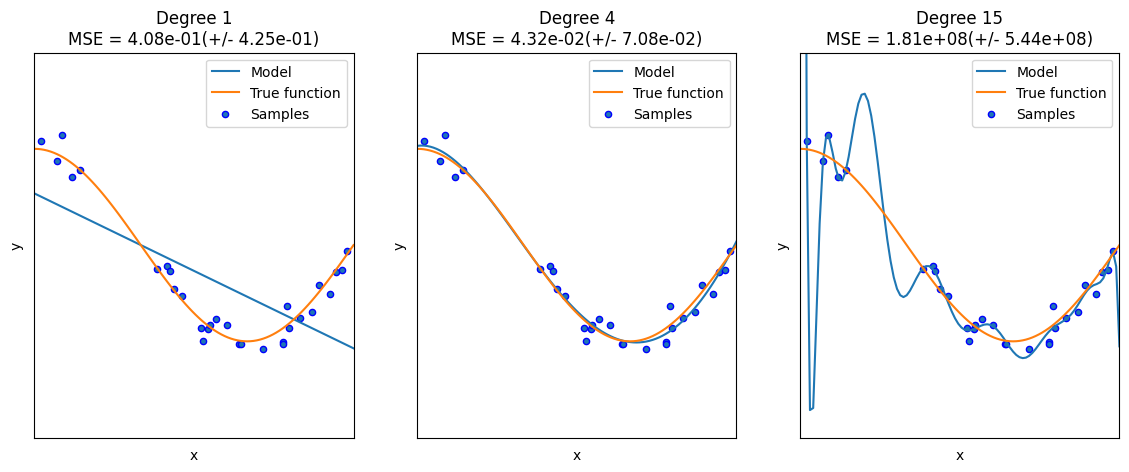

In [ ]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    print(f"model {i} metrics: \n")
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

    print_metrics(true_fun(X_test), pipeline.predict(X_test[:, np.newaxis]))
plt.show()

Advantages of using Polynomial Regression:

- Polynomial provides the best approximation of the relationship between the dependent and independent variable.
A Broad range of function can be fit under it.
Polynomial basically fits a wide range of curvature.

Disadvantages of using Polynomial Regression

- The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
These are too sensitive to the outliers.
In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.